# Project Linear Regression: Boston House Price Prediction

# **Marks: 30**

Welcome to the project on Linear Regression. We will use the Boston house price data for the exercise.

-------------------------------
## Problem Statement
-------------------------------

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
## Data Information
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built before 1940
- **DIS:**      weighted distances to five Boston employment centers
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars

### Let us start by importing the required libraries

In [118]:
# import libraries for data manipulation
import pandas as pd
import numpy as np
import random as rnd


# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set_style('darkgrid')
# settings for seaborn plotting style
sns.set(color_codes=True)
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# import library for scientific computing 
import scipy
import scipy.stats as scipy
import scipy.stats as norm
import scipy.stats as stats
# import uniform distribution
from scipy.stats import uniform
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
from sklearn.preprocessing import PolynomialFeatures
# for validation and classification
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification

### Read the dataset

In [119]:
# read the file
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations**
- The price of the house indicated by the variable MEDV is the target variable.
- The other features are the independent variables based on which to predict house price.
- At first glance, the per capita crime rate by town CRIM is at its lowest (0.0632%) for 
areas that have the highest proportion of residential land zoned ZN for lots over 25,000 sq. ft. 
- The per capita crime rate CRIM by the town is at its highest (6.905%) in areas that have a low 
proportion of non-retail business acres per town INDUS.
- There are 4 out of the 5 towns with no proportion of non-retail business acres per town ZN.
- In towns with a high proportion of non-retail business acres per town INDUS (7.07%), there is 
the largest proportion of owner-occupied units built before 1940 AGE. 
- Nitric oxides concentration (parts per 10 million) NOX, is at its highest in the area(s) where 
there is a high proportion of residential land zoned for lots over 25,000 sq. ft. ZN; this might
assume previously agrarian land ready for development and may not be an essential feature in predicting 
home prices.  
- The average number of rooms per dwelling RM should affect the house prices. 
- There appears to be a correlation between the median value of owner-occupied homes in 1000 dollars MEDV at 24.0, 
and the index of accessibility to radial highways RAD at 1. The lower the accessibility to radial highways, the 
lower the median value of owner-occupied homes in 1000 dollars.
- For these five features, the highest median value of owner-occupied homes MEDV at 36.2, there appears 
the highest per capita crime rate by town CRIM at 6.905%.
- It might be noteworthy that a very small town will not have a suburb. 

### Get information about the dataset using the info() method

In [120]:
# check the info
df.info()

# check the shape of the dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


(506, 13)

**Observations**
* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.
* 13 features can aid in predicting the price of a home. 
* Every column in this dataset is numeric.
* 11 features help predict the housing prices of a town or a suburb. 

In [121]:
# check the unique values in each column
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

**Observations**
- There are two observations (total 506, we have 504) that do not have data per capita crime rate by town CRIM.
- There are only 9 observations for the index of accessibility to radial highways RAD. This might conclude that our data
does not comprise of towns or suburban communities that have a high index of accessibility to radial highways RAD. 

### Let's now check the summary statistics of this dataset

#### **Question 1:** Write the code to find the summary statistics and write your observations based on that. (1 Mark)

In [122]:
# create numerical columns 
numerical_columns = ['CRIM','ZN', 'INDUS', 'CHAS',
                    'NOX','RM','AGE','DIS','RAD',
                    'TAX','PTRATIO','LSTAT','MEDV']
numerical_columns

# check summary statistics
df[numerical_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


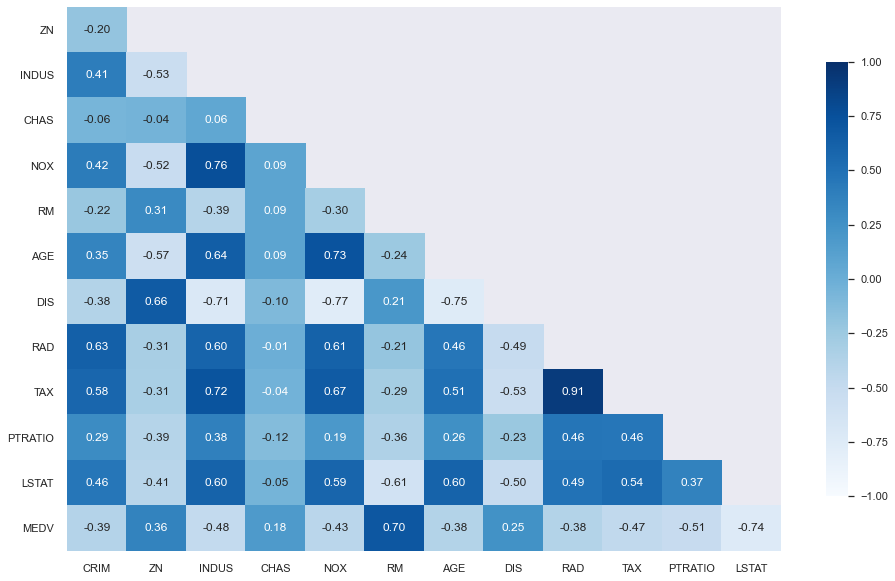

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [123]:
# get correlations
df_correlations = df.corr()

# figure 
fig, ax = plt.subplots(figsize=(16,10))

# mask 
mask = np.triu(np.ones_like(df_correlations, dtype=np.bool8))

# adjust mask and dataframe
mask = mask[1:,:-1]
correlation = df_correlations.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1, cbar_kws={"shrink":.8})

# yticks 
# ticks 
plt.yticks(rotation=0)

plt.show()

# alternative matrix 
df_correlations.style.background_gradient(cmap='coolwarm')


**Observations:**
- The full-value property tax rate per 10,000 dollars TAX is nearly perfect in correlation ~0.910228 with the 
index of accessibility to five Boston employment centers RAD: this may be suggesting that a property's tax rate
is higher near areas where access to employment by way of radial highways is greater.  
- Pupil-teacher ratio by town PTRATIO, does not seem to affect per capita crime rate by town CRIM. 
- It appears that the more weighted distances to Boston employment centers DIS there are, the less 
per capita crime rate CRIM that town might experience. This negative correlation is not significant, however.
- As the median value of owner-occupied homes in 1000 dollars increases MEDV, it would be simple to assume that per 
capita crime rate by town CRIM should also increase; however, this is not the case, there is a negative 
correlation between MEDV and CRIM, albeit small. 
- There is a distinct and negative correlation for the proportion of residential land zoned for lots over 25,000 sq. ft ZN 
and that of INDUS, NOX, AGE, RAD, TAX, LSTAT. It could be possible to hypothesize that the higher the proportion of 
residential land zoned for lots over 25,000 sq. ft., there may be a significant development influx in the town or suburb 
that contributes to fewer non-retail businesses INDUS, fewer pollutants nitric oxide pollutants permitted in the town/suburb NOX,
newer homes that are not originally established in the older part of town but are therefore further away from radial highways RAD, and 
have a % lower status of the population LSTAT. 
- There is no explanation evident why the proportion of residential land zoned for lots over 25,000 sq. ft. ZN appears to be taxed 
at a lower full-value property-tax rate TAX. 
- There is a significant correlation between the proportion of residential land zoned for lots over 25,000 sq. ft. ZN and 
the weighted distances to five Boston employment centers DIS. Hypothetically, where employment centers exist, if land zoned for 
residential has not been entirely utilized, the development will occur to fulfill the need for more housing. 
- The is a very significant correlation between the proportion of non-retail business acres per town INDUS, and the number 
of nitric oxides concentrations NOX. This is possibly suggesting that when land is not developed, it is then used in a way 
that allows for the increased nitric oxides concentrations NOX. 
- When a town or suburb has a low proportion of non-retail business acres per town INDUS, its homes are more proportionally owner-occupied
units built before 1940 AGE. 
- As a town or suburb utilizes its proportion of non-retail business acres INDUS, it experiences an increase in the index of 
accessibility to radial highways RAD, an increase in the full-value property-tax rate per 10,000 dollars TAX, more pupils to teachers ratio PTRATIO
, and an increase in %lower status of population LSTAT. These observations suggest that towns or suburbs near urban cores are more populated and 
have better access to employment, taxed higher, and see more students attending school(s) in those areas.  
- It would seem expected that the concentration of the nitric oxide (parts per 10 million) NOX, would be higher in areas that have a higher proportion 
of non-retail business acres per town INDUS. Perhaps these observations are suggesting that greater distances in the town increase travel, which 
depending on the method of travel can incur more nitric oxide into the atmosphere. 
- The pupil-teacher ratio by town PTRATIO shows hardly any correlation with nitric oxides concentration NOX. This would seem expected. 
- For the average number of rooms per dwelling RM, there is a slight and negative correlation with the other features. There is a significant 
negative correlation between RM, and specifically, %lower status of population LSTAT, which represents an idea that an increase in that number of rooms per 
dwelling doesn't necessarily increase the %lower status of a population as could be assumed. 
- With older homes built before 1940 AGE, there is an increase in nitric oxide concentration NOX and an increase in the proportion of non-retail business
acres per town. This may be implying that older homes are farther apart from each other in a town than the homes that are newly built.
- In older home communities AGE, there is a higher proportion of the population that is part of the lower socioeconomic distinction LSTAT. 
- The older a home is AGE, the farther it is away from the weighted distances to five Boston employment centers DIS. 
- Older homes AGE, have a lower median value of owner-occupied homes in 1000 dollars. 
- From this data, the higher the index of accessibility to radial highways RAD, the higher the proportion of residential land zoned for lots over 25,000 sq. ft.
- The weighted distances to five Boston employment centers, do not significantly affect the median value of owner-occupied homes in 1000 dollars. 
- The average full-value property-tax rate per 10,000 dollars TAX is higher than the median,
which might suggest that some properties pay more per 10,000 dollars than other properties. 
- There is a strong and positive correlation between the average number of rooms per dwelling, RM, and the median value of owner-occupied homes in 1000 dollars MEDV. The more rooms a home has, the more likely it that the home's median value will be higher.

Before performing the modeling, it is important to check the univariate distribution of the variables.

### Univariate Analysis

### Check the distribution of the variables

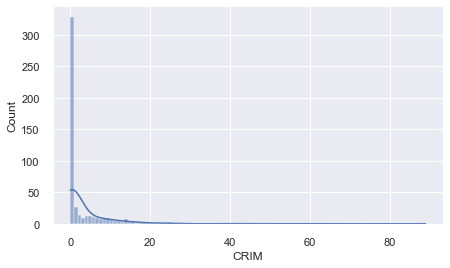

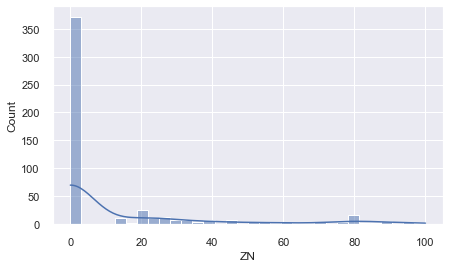

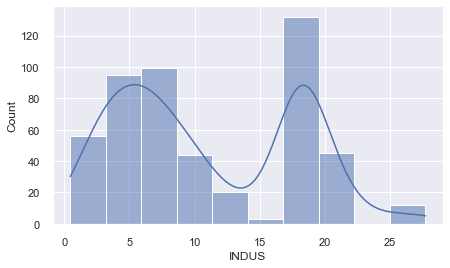

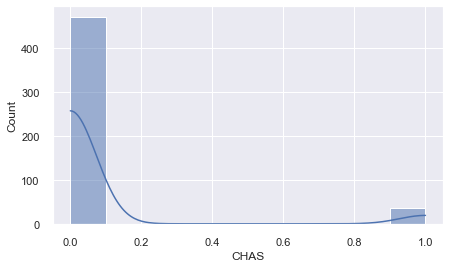

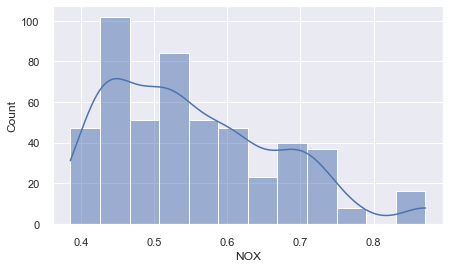

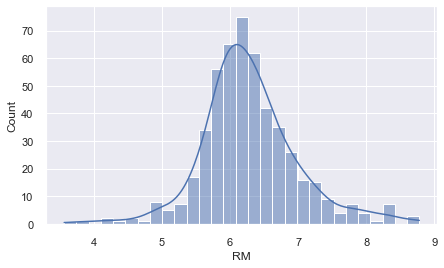

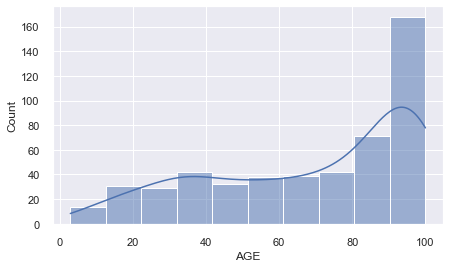

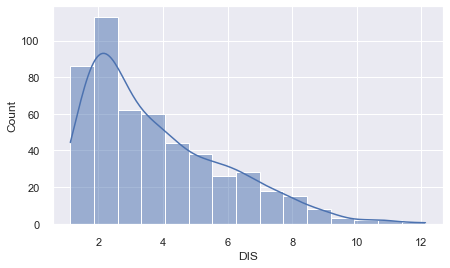

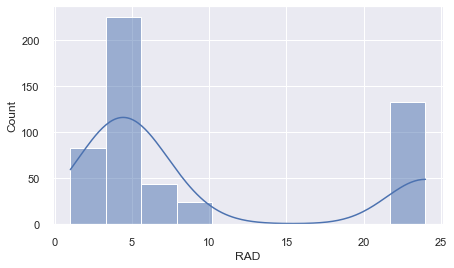

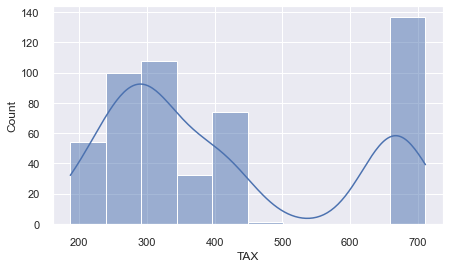

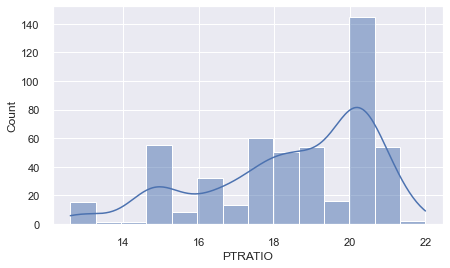

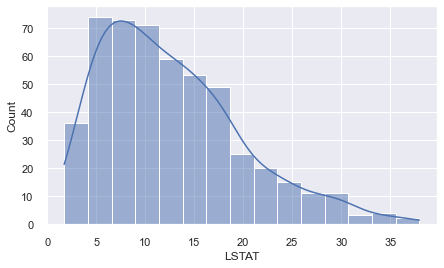

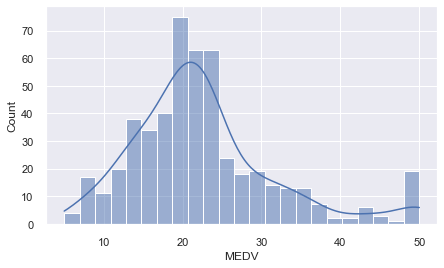

In [124]:
# check the data distribution 
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

In [125]:
# function for exploratory data analysis
# takes a dataset and returns x, y
def ECDF(df):
    # number of data points: n
    n = len(df)
    # x-data for the ECDF: x
    x = np.sort(df)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

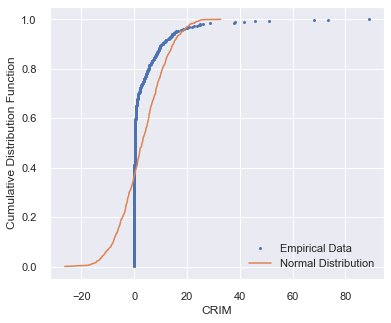

NormaltestResult(statistic=562.7482944823795, pvalue=6.320631961562874e-123)
Sample does not appear Gaussian (reject H0)


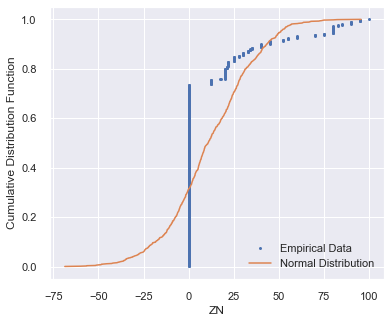

NormaltestResult(statistic=228.27025007187007, pvalue=2.702371210664229e-50)
Sample does not appear Gaussian (reject H0)


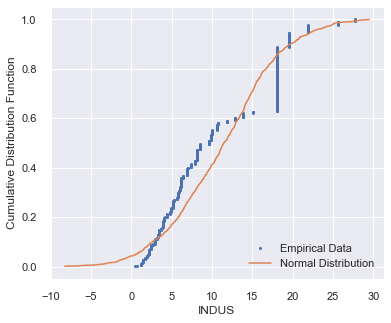

NormaltestResult(statistic=420.09570785887405, pvalue=5.989300492035289e-92)
Sample does not appear Gaussian (reject H0)


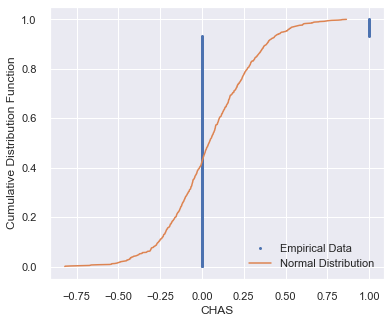

NormaltestResult(statistic=367.2204294388455, pvalue=1.8159208966209064e-80)
Sample does not appear Gaussian (reject H0)


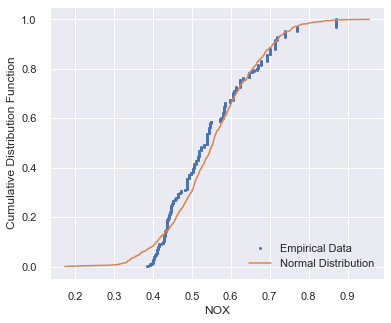

NormaltestResult(statistic=37.509688611575996, pvalue=7.159366727337585e-09)
Sample does not appear Gaussian (reject H0)


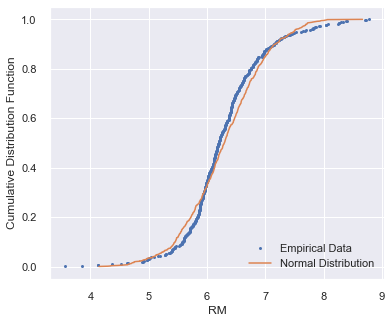

NormaltestResult(statistic=37.89574305099423, pvalue=5.90260814347777e-09)
Sample does not appear Gaussian (reject H0)


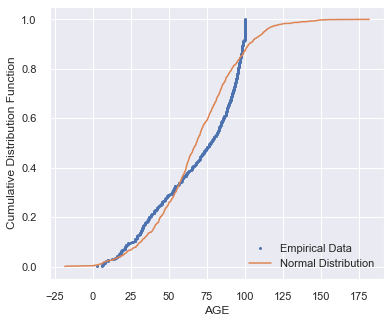

NormaltestResult(statistic=114.16541878648654, pvalue=1.6191768966045395e-25)
Sample does not appear Gaussian (reject H0)


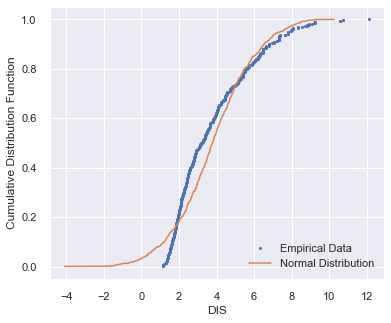

NormaltestResult(statistic=66.94502432373635, pvalue=2.904508639715488e-15)
Sample does not appear Gaussian (reject H0)


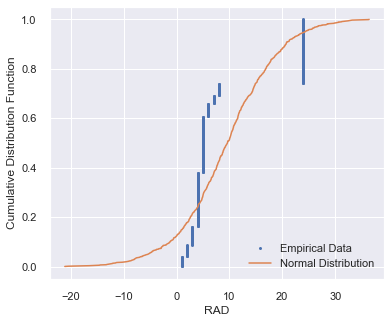

NormaltestResult(statistic=116.94443040972126, pvalue=4.034963327111422e-26)
Sample does not appear Gaussian (reject H0)


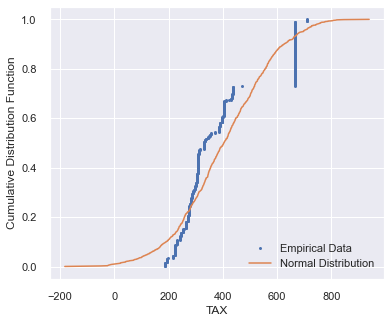

NormaltestResult(statistic=253.21648766490983, pvalue=1.0345186873914037e-55)
Sample does not appear Gaussian (reject H0)


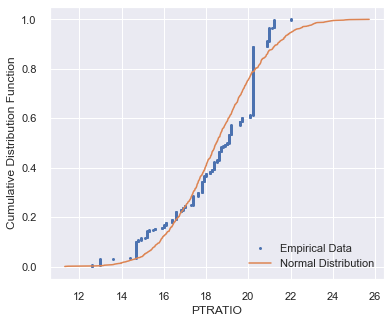

NormaltestResult(statistic=45.944962469039645, pvalue=1.0548195349963486e-10)
Sample does not appear Gaussian (reject H0)


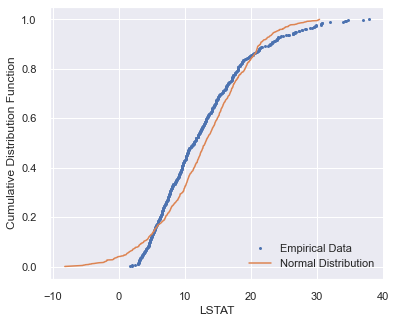

NormaltestResult(statistic=57.20741558175866, pvalue=3.7806593212903944e-13)
Sample does not appear Gaussian (reject H0)


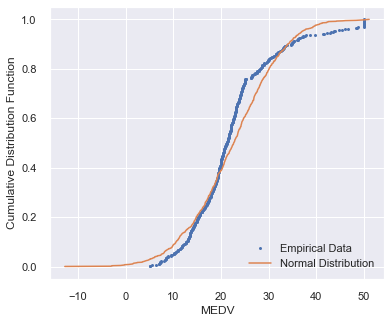

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)
Sample does not appear Gaussian (reject H0)


In [126]:
# iterate through columns and 
# graph empirical data against the 
# normal distribution of the data
from scipy.stats import shapiro
for column in df.columns: 
    x,y=ECDF(df[column])
    plt.figure(figsize=(6,5))
    sns.set()
    plt.plot(x, y, marker=".", linestyle="none")
    plt.xlabel(column)
    plt.ylabel("Cumulative Distribution Function") 
    samples = np.random.normal(np.mean(df[column]), np.std(df[column]), size=1000)
    x_theoretical, y_theoretical = ECDF(samples)
    plt.plot(x_theoretical, y_theoretical)
    plt.legend(('Empirical Data','Normal Distribution'), loc='lower right')
    plt.show(plt)
    # test for normal distribution using 
    # Shapiro-Wilk Test 
    print(stats.normaltest(df[column]))
    alpha = 0.
    stat, p = shapiro(df)
    if p > alpha:
        print('Sample appears Gaussian (fail to reject H0)')
    else: 
        print('Sample does not appear Gaussian (reject H0)') 

**Observations**
* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.ZN has a lot of areas that have absolutely no proportion of residential land zoned for lots over 25,000sq.ft. This seems obvious since these 
are large lots. 
* CRIM is not normally distributed with a p-value less than the alpha. Thus, there is a definite, consequential relationship between CRIM and one other, specific phenomenon in the dataset. 
* CRIM has data deviations at the top of the data suggesting that some areas have much higher crime rates; the data for CRIM is not normally distributed suggesting that there is a natural limit that prevents CRIM data on one side from being 100 percent pure and/or there exist serious outliers in CRIM. 
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* INDUS also follows a non-normal, binomial distribution, with the greater proportion of business acres per town as retail, and non-retail acres comprising up to ~26% of the acreage proportion allotted. 
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940; this is a left-skewed distribution phenomenon.
* NOX nitric oxides concentrations (parts per 10 million) follow a comb-like distribution, alternating between higher concentrations of nitric oxide and lower concentrations of nitric oxides. This could suggest that some of the data for nitric oxides concentrations per 10 million is rounded-off and/or there is an incorrectly constructed histogram because of the rounding of data. Looking at the cumulative distribution, it seems like the NOX data follows a normal distribution, but is in fact, does not. This implies that there is a definite, consequential relationship between NOX and one other, specific phenomenon in the dataset. 
* Upon first glance, it could be assumed that RM, the average number of rooms per dwelling follows a somewhat normal distribution, but this is not true when the empirical data is tested against the true normal distribution curve for rooms per dwelling. The data represents that most of the homes have about 6-7 rooms per dwelling with very few homes comprising more than 8 rooms and some homes comprising of less than 5 rooms. It is tempting to suggest that the data for RM number of rooms per dwelling is somewhat normal, but based on the Cumulative Distribution, there is a distinct phenomenon that is not normally distributed.
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution with tendencies of a dog food distribution(s).**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways. RAD and TAX are within specifications but are missing results near the average. 
* The dependent variable MEDV seems to be slightly right-skewed. This illustrates that most median home values of owner-occupied homes in 1000 dollars are on the lower end of the home median values, with a few having high median values and a few having a really low median value. 
* PTRATIO pupil-teacher ratio by the town is a comb distribution and represents some towns with a high pupil-teacher ratio (a higher population with kids in town needing education services?) to low pupil-teacher ratio (a lower population in town with kids needing education services?). It is noteworthy, that the pupil-teacher ratio is not necessarily dependent on the population in the town, because some towns might have a higher pupil-teacher ratio. After all, they have different values of what qualifies as excellent teaching standards and other towns might have lower / higher pupil-teacher ratios because they may not have enough educated individuals to serve as teachers...many factors can easily reconfigure the data for pupil-teacher ratio. The pupil-teacher ratio does not appear to be highly correlated with housing prices. 

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [127]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

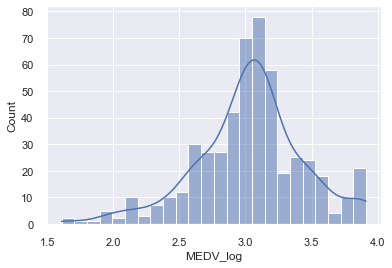

In [128]:
sns.histplot(data=df, x='MEDV_log', kde = True)

**Observations**
* The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### Bivariate Analysis

#### Let's check the correlation using the heatmap 

### **Question 2** (3 Marks):
- **Write the code to plot the correlation heatmap between the variables (1 Mark)**
- **Write your observations (2 Marks)**

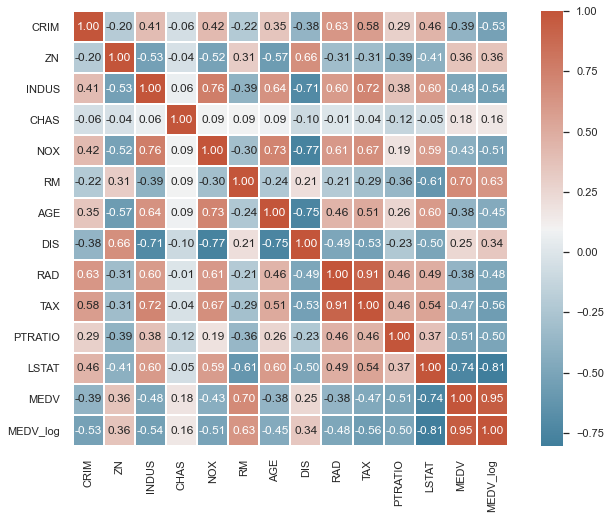

In [129]:
df_correlation_data = df.corr()
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_correlation_data, annot=True,fmt='.2f',cmap=cmap, xticklabels = True, yticklabels = True, cbar=True, linecolor="w", linewidths=1, square = True,) 
plt.show()

**Observations:**
- The log-transformed variable MEDV_log appears negatively correlated for LSTAT, PTRATIO, TAX, RAD, AGE, NOX, INDUS, CRIM. This represents the idea that the median home value of owner-occupied homes is 1000 dollars, decrease if the community has owners with lower educational degrees, fewer students attending schools, are taxed lower, have less access to radial highways, have older homes built before 1940, exhibit more nitric oxide and have more non-retail business acres per town than it might be assumed that the homes' median value of owner-occupied homes in 1000 dollars will be lower overall. 
- There is a near-perfect and positive correlation between the index of accessibility to radial highways RAD and the full-value property-tax rate per 10,000 dollars TAX; this might suggest that homes closer to radial highways are taxed higher than those homes that are further away from radial highways. 
- Pupil-teacher ratio (s) PTRATIO is the same for both TAX and RAD; this may imply that while TAX and RAD are positively correlated, PTRATIO is positively correlated with the increase in RAD radial highway access and home value taxation TAX. 

Now, we will visualize the relationship between the pairs of features having significant correlations.

### Visualizing the relationship between the features having significant correlations (> 0.7) 

### **Question 3** (6 Marks):
- **Create a scatter plot to visualize the relationship between the features having significant correlations (>0.7) (3 Marks)**
- **Write your observations from the plots (3 Marks)**

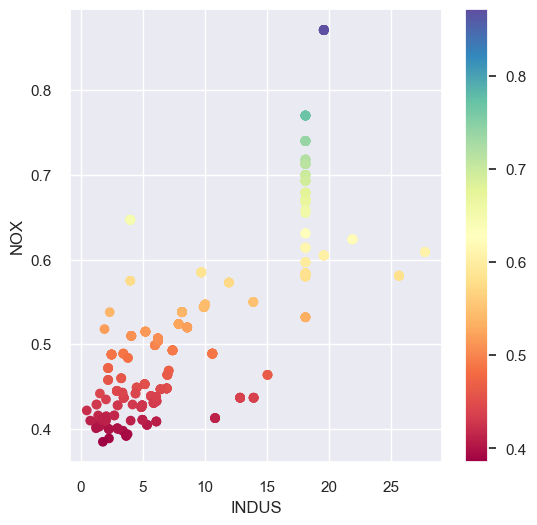

In [130]:
# scatterplot to visualize the relationship between NOX and INDUS
x = df.INDUS
y = df.NOX
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.show()

**Observations:**
- It appears there is a positive association between INDUS and NOX, 
- in general, as proportion of non-retail business acres per town increases, 
-so does the nitric oxides concentration (parts per 10 million). 

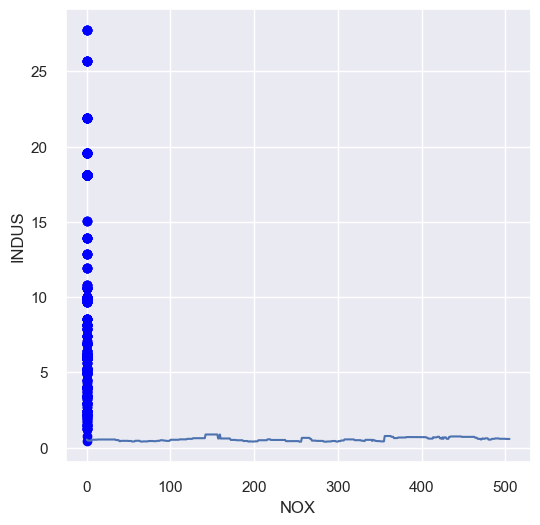

In [131]:
# best fit line using the regression plot between NOX and INDUS
plt.scatter(df.NOX, df.INDUS, color = 'blue')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.plot(df.NOX, )


**Observations:**
- Both NOX and INDUS reject the null hypothesis; This implies that there is a definite, consequential relationship between NOX and another, specific phenomenon in the dataset. 
- There appears to be a positive correlation between NOX and INDUS, nitric oxides concentration (parts per 10 million) increases, so does the proportion of non-retail business acres per town INDUS. Perhaps this is an indicator for land that still needs to be incorporated into a more developed area OR land that simply hasn't been developed in general. 
- There seems to be a density in clustering around the x = ~ 0.4-0.6 INDUS and y= ~ 0.0-10.0 NOX 
- There also appears to be some gaps near the x = ~ 0.65 INDUS and y = ~ 17.0 NOX
- There is definite and linear consistency in data behavior around the x = ~ 0.6-0.8 NOX and y = ~ 18.0 INDUS
- Above the INDUS y= ~ 19.0, there are some outliers. 
- There is a strong pattern of behavior between NOX AND INDUS at x = ~ 19.0 up to y = ~0.75 

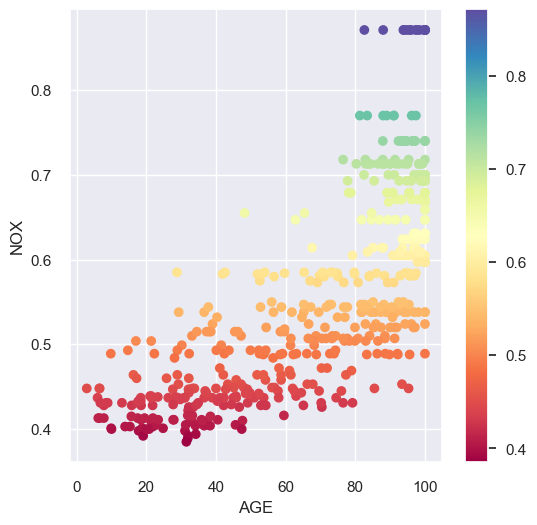

In [132]:
# scatterplot to visualize the relationship between AGE and NOX
x = df.AGE
y = df.NOX
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('AGE')
plt.ylabel('NOX')
plt.show()

**Observations:**
- There is a significant upward and positive trend in the data between AGE and NOX. Suggesting that the older the home (homes built before 1940 typically), the more that there will be a higher concentration of nitric oxides concentration (parts per 10 million) present. 
- This does not necessarily imply that older homes cause the nitric oxide increase. This phenomenon could be associated with empty, undeveloped land in areas that have yet to be fully developed/realized.
- There is a general consistency in behavior around x = ~80-100 AGE up to y = ~ 0.75 NOX

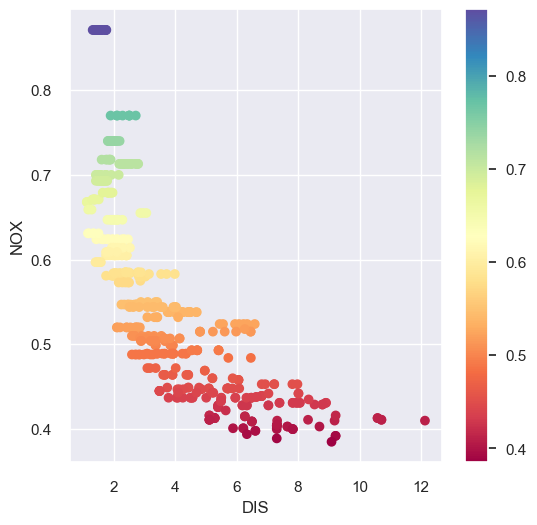

In [133]:
# scatterplot to visualize the relationship between DIS and NOX
x = df.DIS
y = df.NOX
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('DIS')
plt.ylabel('NOX')
plt.show()

**Observations:**
- There is a consistent and strong downward pattern between DIS, weighted distances to five Boston employment centers, and NOX, nitric oxides concentration (parts per 10 million). 
- It would be easy to evaluate the prevalence of nitric oxide near homes that are further away from weighted distances to five Boston employment centers; however, this assumption is only somewhat correct, but does not encompass the entire verity of the phenomenon. 
- The weighted distances to five Boston employment centers has a strong, negative effect on NOX, nitric oxides concentration (parts per 10 million). Meaning, the farther away home is from the weighted distances to five Boston employment centers, the fewer nitric oxides concentrations there will be present in the air; however, nitric oxide isn't entirely dependent on the distance of employment facilities. See more below.  
- The primary source of atmospheric nitric oxide, particularly in urban areas, is the combustion of fossil fuels. Other anthropogenic sources include some forms of welding, electroplating, dynamite blasting, or combustion of nitrocellulose or certain shoe polishes, and in the reaction between nitric acid and any organic materials, so with that said, nitric acid could be higher in areas of farming too, where weighted distances to five Boston employment centers and NOX would be assumed lower. 

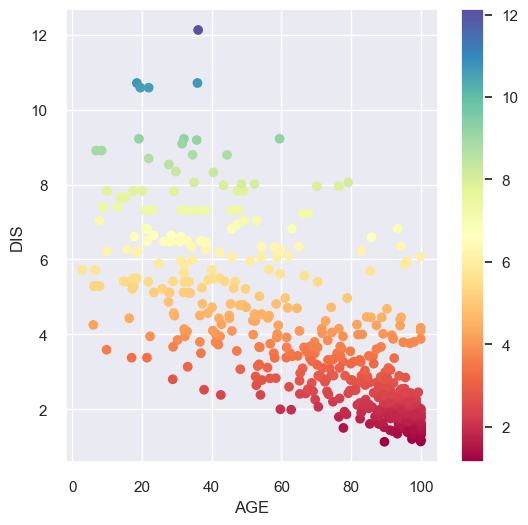

In [134]:
# scatterplot to visualize the relationship between AGE and DIS
x = df.AGE
y = df.DIS
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('AGE')
plt.ylabel('DIS')
plt.show()


**Observations:**
* The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

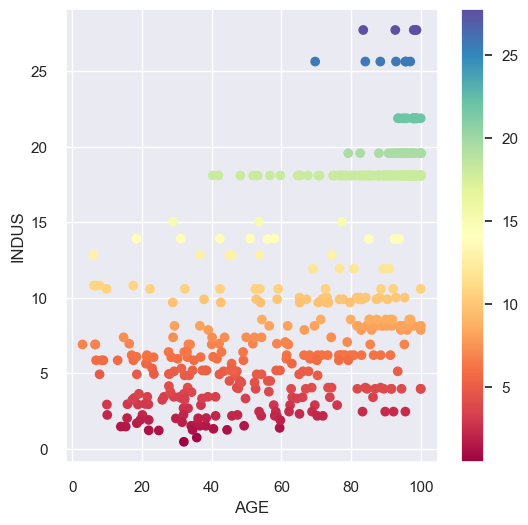

In [135]:
# scatterplot to visualize the relationship between AGE and INDUS
x = df.AGE
y = df.INDUS
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('AGE')
plt.ylabel('INDUS')
plt.show()

**Observations:**
* No trend between the two variables is visible in the above plot.

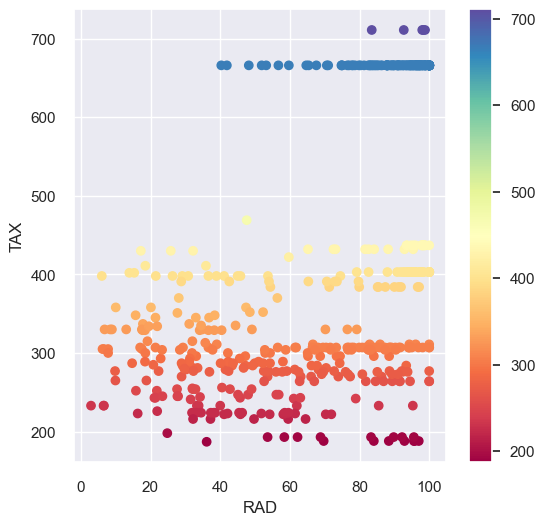

In [136]:
# scatterplot to visulaize the relationship between RAD and TAX
y = df.TAX
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('RAD')
plt.ylabel('TAX')
plt.show()

**Observations:**
* The correlation between RAD and TAX is very high. But, no trend is visible between the two variables since at the top, 
* there represents a degree of outliers. 

Let's check the correlation after removing the outliers.

In [137]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196



**Observations:**
- The relationship between TAX and RAD is r < 0.3. The line for linearity is difficult to detect and 
- suggests that the two features do not possess a relationship, or possess a very weak relationship.

So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.


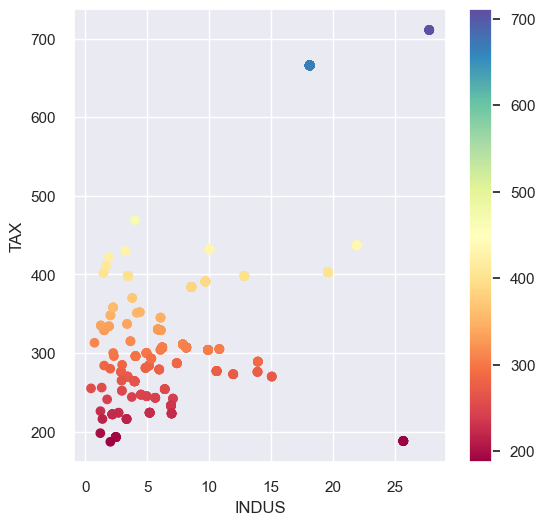

In [138]:
# scatterplot to visualize the relationship between INDUS and TAX
x = df.INDUS
y = df.TAX
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('INDUS')
plt.ylabel('TAX')
plt.show()

**Observations:**
* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related to a third variable (not sure what that is yet).

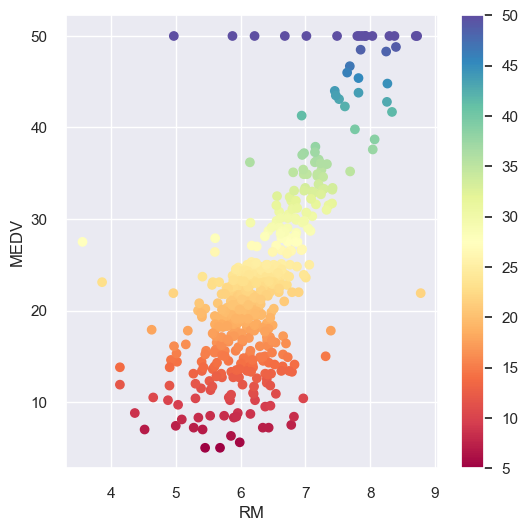

In [139]:
# scatterplot to visulaize the relationship between RM and MEDV
x = df.RM
y = df.MEDV
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

**Observations:**
* The price of the house seems to increase as the value of RM increases. 
* A strong relationship is illustrated for the plot between RM and MEDV.
* This is expected as the price is generally higher for a home possessing more rooms.
* There are a few outliers in a horizontal line as the MEDV value appears capped at 50.

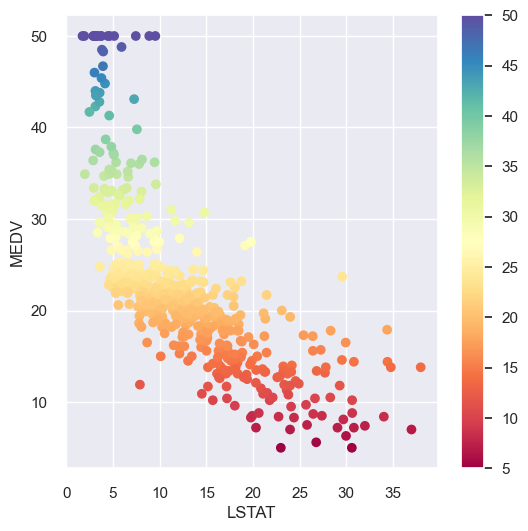

In [140]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
x = df.LSTAT
y = df.MEDV
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

**Observations:**
* LSTAT and MEDV have a strong, negative correlation. 
* Homes in %lower status populations have a generally lower median value than the average home value(s). 

Linear regression model to look at the target variable, MEDV and each feature. 

In [141]:
X = pd.DataFrame(df['MEDV_log'])
y = pd.DataFrame(df['CRIM'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train,test) in enumerate(kfold.split(X,y)): 
    model.fit(X.iloc[train, :], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.30416307332836456, 0.20510102667232066, 0.20057607443965453]


In [142]:
# dataset is stored in a Pandas Dataframe. Let us take out all the variables in a numpy array.
MEDV_log = df.MEDV_log.values.reshape(len(df.MEDV_log), 1)
RM = df.RM.values.reshape(len(df.RM), 1)
CRIM = df.CRIM.values.reshape(len(df.CRIM), 1)
ZN = df.ZN.values.reshape(len(df.ZN), 1)
INDUS = df.INDUS.values.reshape(len(df.INDUS), 1)
CHAS = df.CHAS.values.reshape(len(df.CHAS), 1)
NOX = df.NOX.values.reshape(len(df.NOX), 1)
AGE = df.AGE.values.reshape(len(df.AGE), 1)
DIS = df.DIS.values.reshape(len(df.DIS), 1)
RAD = df.RAD.values.reshape(len(df.RAD), 1)
TAX = df.TAX.values.reshape(len(df.TAX), 1)
PTRATIO = df.PTRATIO.values.reshape(len(df.PTRATIO), 1)
LSTAT = df.LSTAT.values.reshape(len(df.LSTAT), 1)

In [143]:
# fit the simple linear regression model with the RM feature
room_model = linear_model.LinearRegression()
room_model.fit(RM, MEDV_log)
coeffs_room = np.array(list(room_model.intercept_.flatten()) + list(room_model.coef_.flatten()))
coeffs_room_list = list(coeffs_room)

# fit the simple linear regression model with the CRIM feature
crime_model = linear_model.LinearRegression()
crime_model.fit(CRIM, MEDV_log)
coeffs_crime = np.array(list(crime_model.intercept_.flatten())+ list(crime_model.coef_.flatten()))
coeffs_crime_list = list(coeffs_crime) 

# fit the simple linear regression model with ZN feature 
zone_model = linear_model.LinearRegression()
zone_model.fit(ZN, MEDV_log)
coeffs_zone = np.array(list(zone_model.intercept_.flatten())+ list(zone_model.coef_.flatten()))
coeffs_zone = list(coeffs_zone) 

# fit the simple linear regression model with INDUS feature 
industry_model = linear_model.LinearRegression()
industry_model.fit(INDUS, MEDV_log)
coeffs_industry = np.array(list(industry_model.intercept_.flatten())+ list(industry_model.coef_.flatten()))
coeffs_industry = list(coeffs_industry) 

# fit the simple linear regression model with CHAS feature 
CharlesRiver_model = linear_model.LinearRegression()
CharlesRiver_model.fit(CHAS, MEDV_log)
coeffs_charlesriver = np.array(list(CharlesRiver_model.intercept_.flatten())+ list(CharlesRiver_model.coef_.flatten()))
coeffs_charlesriver = list(coeffs_charlesriver) 

# fit the simple linear regression model with NOX feature 
nitric_oxide_model = linear_model.LinearRegression()
nitric_oxide_model.fit(NOX, MEDV_log)
coeffs_nitric_oxide = np.array(list(nitric_oxide_model.intercept_.flatten())+ list(nitric_oxide_model.coef_.flatten()))
coeffs_nitric_oxide = list(coeffs_nitric_oxide) 

# fit the simple linear regression model with AGE feature 
age_model = linear_model.LinearRegression()
age_model.fit(AGE, MEDV_log)
coeffs_age = np.array(list(age_model.intercept_.flatten())+ list(age_model.coef_.flatten()))
coeffs_age = list(coeffs_age) 

# fit the simple linear regression model with DIS feature 
distance_model = linear_model.LinearRegression()
distance_model.fit(DIS, MEDV_log)
coeffs_distance = np.array(list(distance_model.intercept_.flatten())+ list(distance_model.coef_.flatten()))
coeffs_distance = list(coeffs_distance) 

# fit the simple linear regression model with RAD feature 
radial_highways_model = linear_model.LinearRegression()
radial_highways_model.fit(RAD, MEDV_log)
coeffs_radial_highways = np.array(list(radial_highways_model.intercept_.flatten())+ list(radial_highways_model.coef_.flatten()))
coeffs_radial_highways = list(coeffs_radial_highways) 

# fit the simple linear regression model with TAX feature 
tax_model = linear_model.LinearRegression()
tax_model.fit(TAX, MEDV_log)
coeffs_tax = np.array(list(tax_model.intercept_.flatten())+ list(tax_model.coef_.flatten()))
coeffs_tax = list(coeffs_tax) 

# fit the simple linear regression model with PTRATIO feature 
pupil_teacher_ratio_model = linear_model.LinearRegression()
pupil_teacher_ratio_model.fit(PTRATIO, MEDV_log)
coeffs_pupil_teacher = np.array(list(pupil_teacher_ratio_model.intercept_.flatten())+ list(pupil_teacher_ratio_model.coef_.flatten()))
coeffs_pupil_teacher = list(coeffs_pupil_teacher) 

# fit the simple linear regression model with LSTAT feature 
lower_stat_model = linear_model.LinearRegression()
lower_stat_model.fit(LSTAT, MEDV_log)
coeffs_lower_stat = np.array(list(lower_stat_model.intercept_.flatten())+ list(lower_stat_model.coef_.flatten()))
coeffs_lower_stat = list(coeffs_lower_stat) 

In [144]:
# store results in a dictionary and display using a dataframe
dictionary_MEDV_log = {}
dictionary_MEDV_log['RM'] = coeffs_room
dictionary_MEDV_log['CRIM'] = coeffs_crime
dictionary_MEDV_log['ZN'] = coeffs_zone
dictionary_MEDV_log['INDUS'] = coeffs_industry
dictionary_MEDV_log['CHAS'] = coeffs_charlesriver
dictionary_MEDV_log['NOX'] = coeffs_nitric_oxide
dictionary_MEDV_log['AGE'] = coeffs_age
dictionary_MEDV_log['DIS'] = coeffs_distance
dictionary_MEDV_log['RAD'] = coeffs_radial_highways
dictionary_MEDV_log['TAX'] = coeffs_tax
dictionary_MEDV_log['PTRATIO'] = coeffs_pupil_teacher
dictionary_MEDV_log['LSTAT'] = coeffs_lower_stat

metric_Df_MEDV_LOG = pd.DataFrame(dictionary_MEDV_log)
metric_Df_MEDV_LOG.index = ['Intercept', 'Coefficient']
metric_Df_MEDV_LOG

,RM,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
Intercept,0.723736,3.125172,2.962148,3.393866,3.016879,4.033594,3.486027,2.781991,3.250576,3.590424,4.782803,3.617572
Coefficient,0.367687,-0.025089,0.006368,-0.032267,0.254935,-1.801135,-0.006584,0.066540,-0.022626,-0.001362,-0.094730,-0.046080


**Observations**
* The intercept does not seem to have any intrinsic meaning. There is no interest in the intercept. 
* Looking at the coefficients the sample(s) do not appear Gaussian, so we reject the H0.
* Rejecting the H0 suggests that each independant variable is having some effect on the dependent variable. 
* RM has a relatively higher effect on MEDV_log, more rooms in a home means a higher median home value.
* From these coefficients: RM, CHAS, DIS have some general effect on the median value of homes.
* From these coefficients: CRIM, ZN, INDUS, RAD, PTRATIO, LSTAT have a relatively benign effect on the value of homes.
* From these coefficients: NOX, AGE, TAX have very little, if any effect on the median value of a home relatively. 

In [145]:
# calculate R^2
room_rsquared = room_model.score(RM, MEDV_log)
crime_rsquared = crime_model.score(CRIM,MEDV_log)
zone_rsquared = zone_model.score(ZN, MEDV_log)
industry_rsquared = industry_model.score(INDUS, MEDV_log)
charlesriver_rsquared = CharlesRiver_model.score(CHAS, MEDV_log)
nitric_oxide_rsquared = nitric_oxide_model.score(NOX, MEDV_log)
age_rsquared = age_model.score(AGE, MEDV_log)
distance_rsquared = distance_model.score(DIS, MEDV_log)
radial_highways_rsquared = radial_highways_model.score(RAD, MEDV_log)
tax_rsquared = tax_model.score(TAX, MEDV_log)
pupil_teacher_ratio_rsquared = pupil_teacher_ratio_model.score(PTRATIO, MEDV_log)
lower_stat_rsquared = lower_stat_model.score(LSTAT, MEDV_log)

print('RM simple linear regression R-Square: ', room_rsquared, crime_rsquared, 
                                                zone_rsquared, industry_rsquared, 
                                                charlesriver_rsquared, nitric_oxide_rsquared,
                                                age_rsquared, distance_rsquared,radial_highways_rsquared,
                                                tax_rsquared, pupil_teacher_ratio_rsquared,lower_stat_rsquared,
                                                )

# all of the R^2 values 
list_rsquared = [room_rsquared,crime_rsquared, zone_rsquared, 
                industry_rsquared, charlesriver_rsquared, 
                nitric_oxide_rsquared, age_rsquared, distance_rsquared,
                radial_highways_rsquared,tax_rsquared,
                pupil_teacher_ratio_rsquared,lower_stat_rsquared,
                ]
list_rsquared

RM simple linear regression R-Square:  0.3994508169641333 0.27872737247413826 0.13201922502809071 0.29328307673701093 0.025094342519540902 0.26071266117532765 0.2055912474177395 0.11749834615110688 0.23229576652986506 0.3152436876700483 0.25173159757667685 0.6480799374211881


[0.3994508169641333,
 0.27872737247413826,
 0.13201922502809071,
 0.29328307673701093,
 0.025094342519540902,
 0.26071266117532765,
 0.2055912474177395,
 0.11749834615110688,
 0.23229576652986506,
 0.3152436876700483,
 0.25173159757667685,
 0.6480799374211881]

**Observations**
* It is obvious from the R^2 values that the regression model accounts for little variance, and 
* thus the data points are farther away from the regression line. 

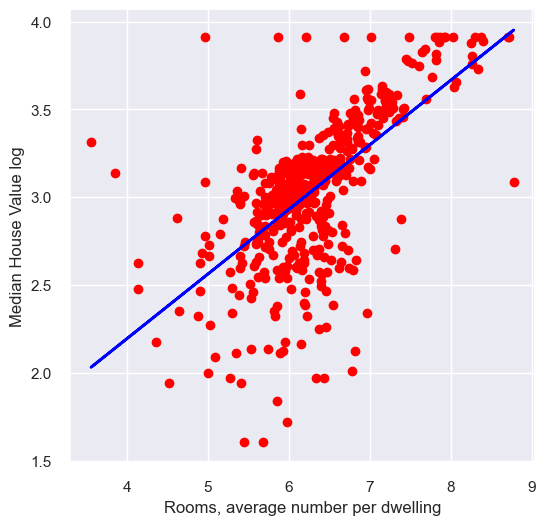

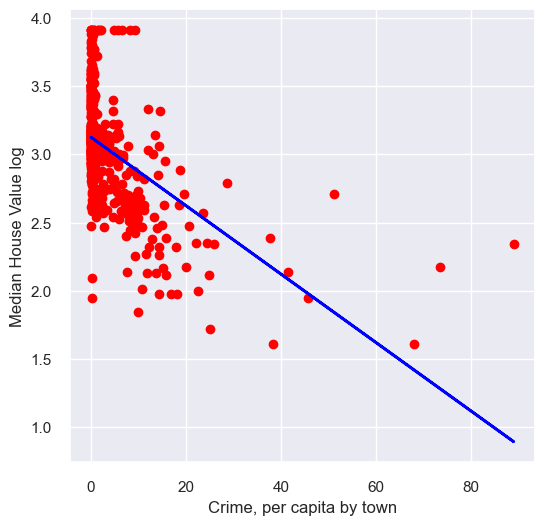

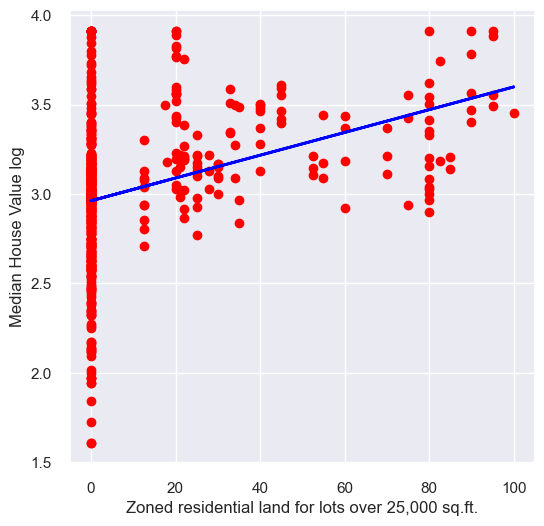

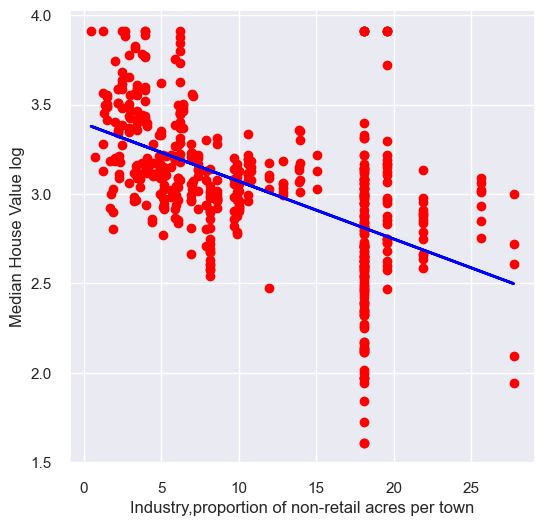

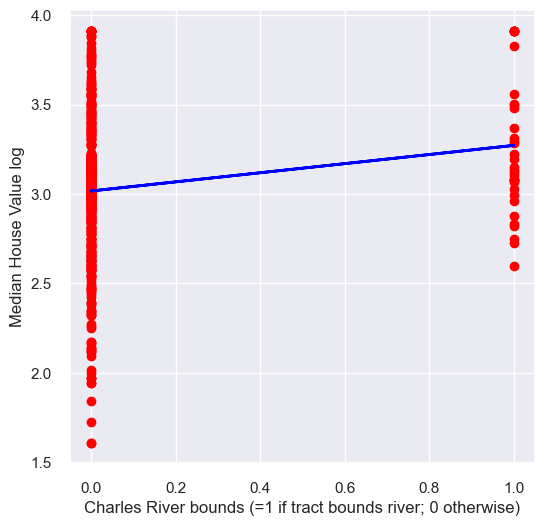

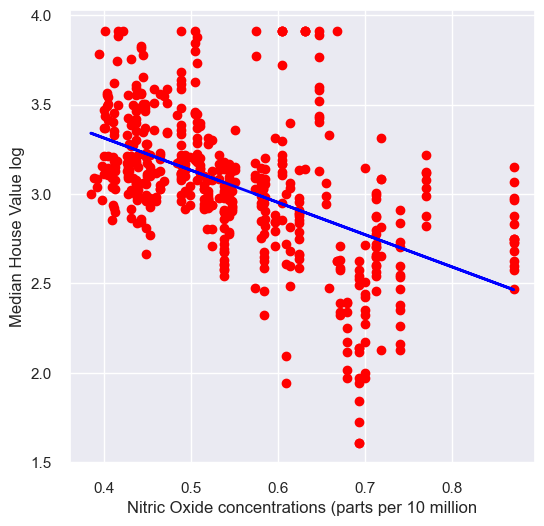

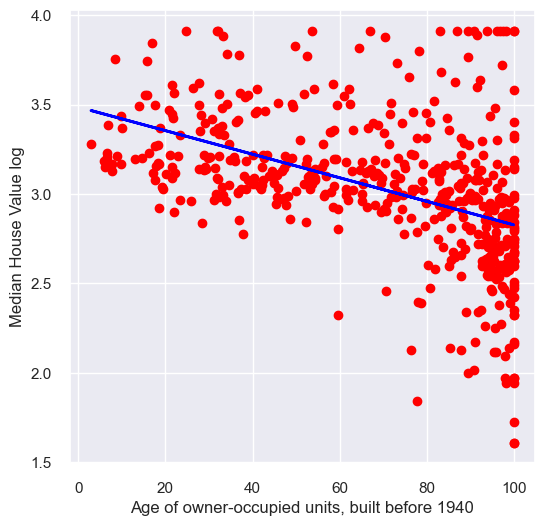

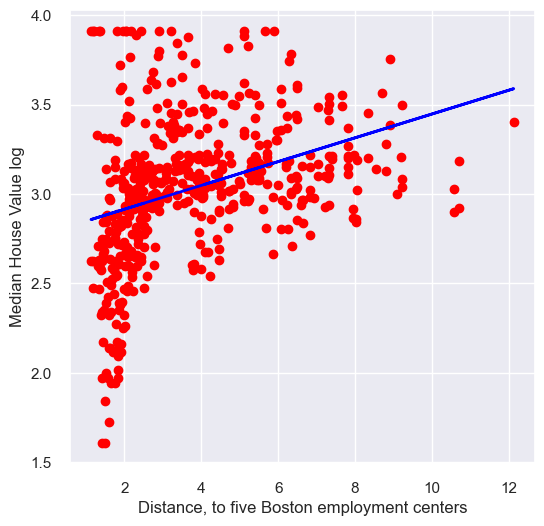

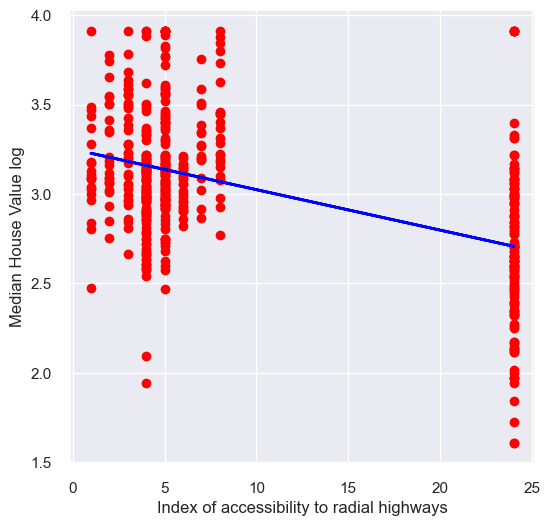

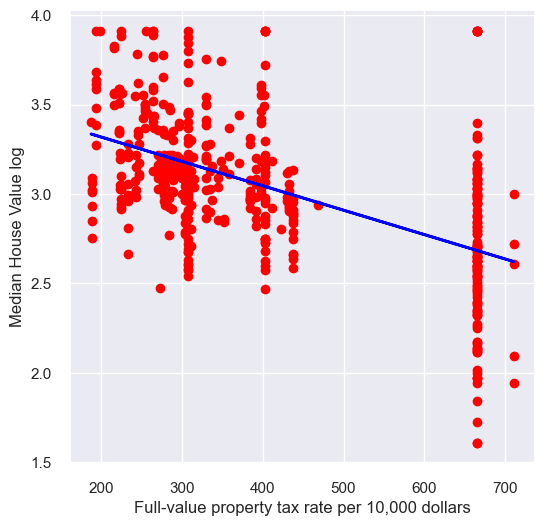

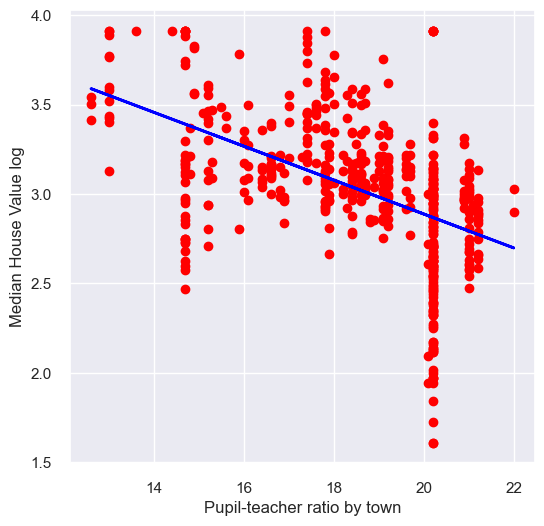

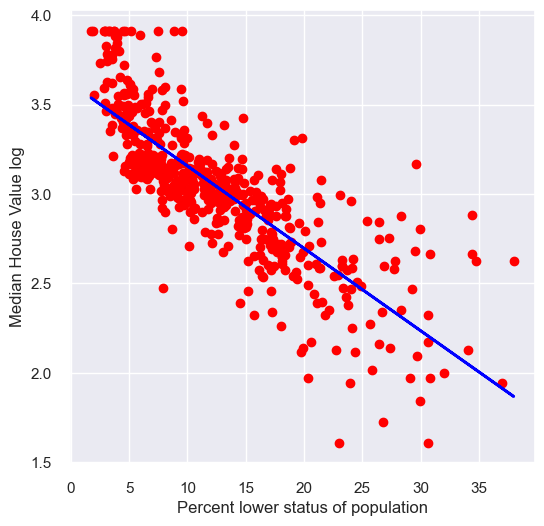

In [146]:
# plot regression for RM feature 
plt.scatter(RM,MEDV_log, color = 'red')
plt.xlabel('Rooms, average number per dwelling')
plt.ylabel('Median House Value log')
plt.plot(RM, room_model.predict(RM), color = 'blue', linewidth = 2)
plt.show()

# plot regression for CRIM feature 
plt.scatter(CRIM,MEDV_log, color = 'red')
plt.xlabel('Crime, per capita by town')
plt.ylabel('Median House Value log')
plt.plot(CRIM, crime_model.predict(CRIM), color = 'blue', linewidth = 2)
plt.show()

# plot regression for ZN feature 
plt.scatter(ZN,MEDV_log, color = 'red')
plt.xlabel('Zoned residential land for lots over 25,000 sq.ft.')
plt.ylabel('Median House Value log')
plt.plot(ZN, zone_model.predict(ZN), color = 'blue', linewidth = 2)
plt.show()

# plot regression for INDUS feature 
plt.scatter(INDUS,MEDV_log, color = 'red')
plt.xlabel('Industry,proportion of non-retail acres per town')
plt.ylabel('Median House Value log')
plt.plot(INDUS, industry_model.predict(INDUS), color = 'blue', linewidth = 2)
plt.show()

# plot regression for CHAS feature 
plt.scatter(CHAS,MEDV_log, color = 'red')
plt.xlabel('Charles River bounds (=1 if tract bounds river; 0 otherwise)')
plt.ylabel('Median House Value log')
plt.plot(CHAS, CharlesRiver_model.predict(CHAS), color = 'blue', linewidth = 2)
plt.show()

# plot regression for NOX feature 
plt.scatter(NOX,MEDV_log, color = 'red')
plt.xlabel('Nitric Oxide concentrations (parts per 10 million')
plt.ylabel('Median House Value log')
plt.plot(NOX, nitric_oxide_model.predict(NOX), color = 'blue', linewidth = 2)
plt.show()

# plot regression for AGE feature 
plt.scatter(AGE,MEDV_log, color = 'red')
plt.xlabel('Age of owner-occupied units, built before 1940')
plt.ylabel('Median House Value log')
plt.plot(AGE, age_model.predict(AGE), color = 'blue', linewidth = 2)
plt.show()

# plot regression for DIS feature 
plt.scatter(DIS,MEDV_log, color = 'red')
plt.xlabel('Distance, to five Boston employment centers')
plt.ylabel('Median House Value log')
plt.plot(DIS, distance_model.predict(DIS), color = 'blue', linewidth = 2)
plt.show()

# plot regression for RAD feature 
plt.scatter(RAD,MEDV_log, color = 'red')
plt.xlabel('Index of accessibility to radial highways')
plt.ylabel('Median House Value log')
plt.plot(RAD, radial_highways_model.predict(RAD), color = 'blue', linewidth = 2)
plt.show()

# plot regression for TAX feature 
plt.scatter(TAX,MEDV_log, color = 'red')
plt.xlabel('Full-value property tax rate per 10,000 dollars')
plt.ylabel('Median House Value log')
plt.plot(TAX, tax_model.predict(TAX), color = 'blue', linewidth = 2)
plt.show()

# plot regression for PTRATIO feature 
plt.scatter(PTRATIO,MEDV_log, color = 'red')
plt.xlabel('Pupil-teacher ratio by town')
plt.ylabel('Median House Value log')
plt.plot(PTRATIO, pupil_teacher_ratio_model.predict(PTRATIO), color = 'blue', linewidth = 2)
plt.show()

# plot regression for LSTAT feature 
plt.scatter(LSTAT,MEDV_log, color = 'red')
plt.xlabel('Percent lower status of population')
plt.ylabel('Median House Value log')
plt.plot(LSTAT, lower_stat_model.predict(LSTAT), color = 'blue', linewidth = 2)
plt.show()

**Observations:**
* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
* There are few outliers and the data seems to be capped at 50.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 80:20 for train and test set.

In [147]:
# separate the dependent and independent variable
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# add the intercept term
X = sm.add_constant(X)

In [148]:
# split the data in 80:20 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , train_size=.80, random_state=1)

In [149]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(102,)

Next, we will check the multicollinearity in the train dataset.

### Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  545.469224
1      CRIM    1.725903
2        ZN    2.515170
3     INDUS    3.812858
4      CHAS    1.072320
5       NOX    4.421201
6        RM    1.925194
7       AGE    3.225755
8       DIS    4.205930
9       RAD    8.076667
10      TAX    9.807470
11  PTRATIO    1.859054
12    LSTAT    2.988056


**Observations:**
* There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

#### **Question 4:** Drop the column 'TAX' from the training data and check if multicollinearity is removed? (1 Mark)

In [151]:
# drop TAX, RAD column
X_train_drop_Tax_Rad = df.drop(columns = {'TAX', 'RAD'})

# add the intercept term
add_constant_X_train = sm.add_constant(X_train_drop_Tax_Rad)

# check for VIF
print(checking_vif(add_constant_X_train))

# check X_Train shape
add_constant_X_train.shape

     feature          VIF
0      const  1509.823463
1       CRIM     1.819438
2         ZN     2.221354
3      INDUS     3.171675
4       CHAS     1.084542
5        NOX     4.014387
6         RM     2.307275
7        AGE     3.060737
8        DIS     4.390363
9    PTRATIO     1.638335
10     LSTAT     4.197765
11      MEDV    18.009496
12  MEDV_log    21.794429


(506, 13)

Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

#### **Question 5:** Write the code to create the linear regression model and print the model summary. Write your observations from the model. (3 Marks)

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#splitting the data in 80:20 ratio of train to test data
X_train_model1, X_test_model1, y_train_model1, y_test_model1 = train_test_split(X, Y, test_size=0.20 , train_size=.80, random_state=1)
print(X_train.shape)
print(y_train.shape)

model1 = sm.OLS(y_train_model1,X_train_model1).fit()
print(model1.summary())

# calculate residual sum of squares 
print('SSR IS:', model1.ssr)

(404, 13)
(404,)
                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     117.8
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          1.02e-121
Time:                        19:18:47   Log-Likelihood:                 101.65
No. Observations:                 404   AIC:                            -177.3
Df Residuals:                     391   BIC:                            -125.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4875      0.222   

**Observations:**
* The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
* The adjusted R^2 is 0.777, which suggests there is high variance in the dependent variable. 
* R^2 does not indicate the correctness of this model. 
* Thus, R^2 data suggests that 77.70% of the data fit the regression model.
* Beware, a high R^2 could indicate problems with the regression model.
* The null hypothesis is rejected and the alternative hypothesis accepted, within the margin of error.
* There is much less than a 1% chance that the F-statistic of 177.8 could have occurred by chance under the assumption of a valid Null hypothesis.

#### **Question 6:** Drop insignificant variables from the above model and create the regression model again. (2 Marks)

### Examining the significance of the model

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [153]:
import statsmodels.api as sm 

# create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df dataframe
Y = df['MEDV_log']
X = df.drop(columns=['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS']) 
X = sm.add_constant(X)

#splitting the data in 80:20 ratio of train to test data
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X, Y, test_size=0.20 , train_size=.80, random_state=1)
print(X_train_model2.shape)
print(y_train_model2.shape)

model2 = sm.OLS(y_train_model2,X_train_model2).fit()
print(model2.summary())

# calculate residual sum of squares 
print('SSR IS:', model2.ssr)


(404, 9)
(404,)
                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     171.3
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          2.30e-123
Time:                        19:18:47   Log-Likelihood:                 95.125
No. Observations:                 404   AIC:                            -172.2
Df Residuals:                     395   BIC:                            -136.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4259      0.223    

**Observations:**
* We can see that the **R-squared value has decreased by 0.002**, since we have removed variables from the model, whereas the **adjusted R-squared value has increased by 0.001**, since we removed statistically insignificant variables only.

Now, we will check the linear regression assumptions.

### Check the below linear regression assumptions

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

#### **Question 7:** Write the code to check the above linear regression assumptions and provide insights. (4 Marks)

#### Check for mean residuals

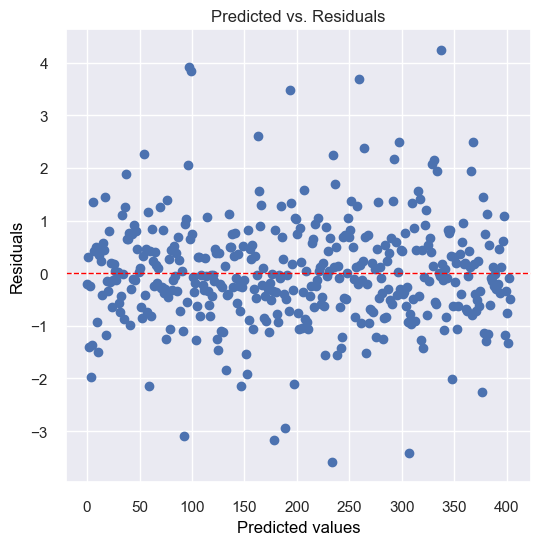

In [154]:
import statsmodels.api as sm 
from yellowbrick.regressor import ManualAlphaSelection

OLSInfluence = model2.get_influence()
residuals = OLSInfluence.resid_studentized_internal
X_train = np.arange(0,len(X_train),1)
plt.scatter(X_train, residuals)
plt.title('Predicted vs. Residuals')
plt.xlabel('Predicted values', color='black')
plt.ylabel('Residuals', color = 'black')
plt.axhline(y=0,color='red', linestyle='--', linewidth=1)


**Observations:**
* Residuals are on the y-axis.
* Fitted, predicted values are on the x-axis. 
* Some data points fall directly on the estimated regression line and therefore, have a residual of 0. 
* The residuals bounce somewhat randomly around the 0 lines. 
* This suggests that the assumption that the relationship is linear is somewhat reasonable.
* The residuals also roughly form a horizontal band around the 0 lines. 
* This suggests that the variances of the error terms are somewhat equal. 
* A few residuals at the top and bottom stand out from the basic random pattern of residuals. 
* This suggests that there are some outliers in the data. 

#### Check for homoscedasticity

* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [155]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [156]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model2.resid, model2.model.exog)
lzip(name, test)

[('F statistic', 1.043073358248476), ('p-value', 0.3849358856033625)]

**Observations:**
- The p-value is 0.30190 which indicates weak evidence against the null hypothesis, thus it fails to reject the null hypothesis.
- Furthermore, the high p-value signifies that the data correlation is not statistically significant. 
- There is a `70% confidence interval 

could be interpreted that repeating this median value study many times, given that the null hypotheiss and all other assumptions are true, the residuals have a constant variance and the result of the p-value is not unusual. 

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

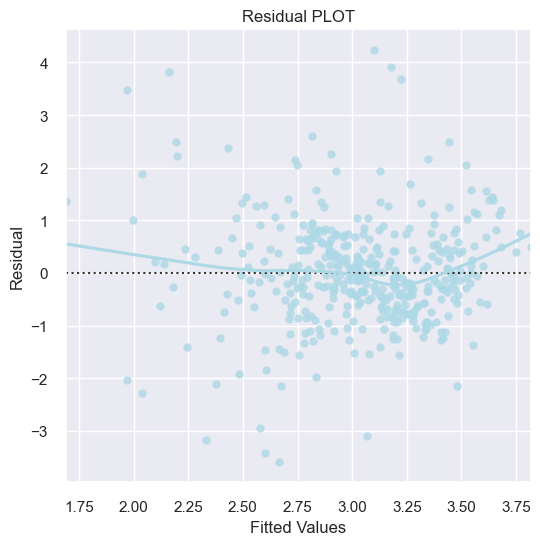

In [157]:
# predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True) 
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:**
**Observations:**
* Residuals are on the y-axis.
* Fitted, predicted values are on the x-axis. 
* A good number of data points fall directly on the estimated regression line and therefore, have a residual of 0. 
* The residuals bounce somewhat randomly around the 0 lines, but concentrate heavily around the linear line. 
* This suggests that the assumption that the relationship is linear is somewhat reasonable.
* The residuals also roughly form a horizontal band around the 0 lines. 
* This suggests that the variances of the error terms are somewhat equal. 
* A few residuals at the top and bottom stand out from the basic random pattern of residuals. 
* This suggests that there are some outliers in the data. 

#### Normality of error terms
The residuals should be normally distributed.

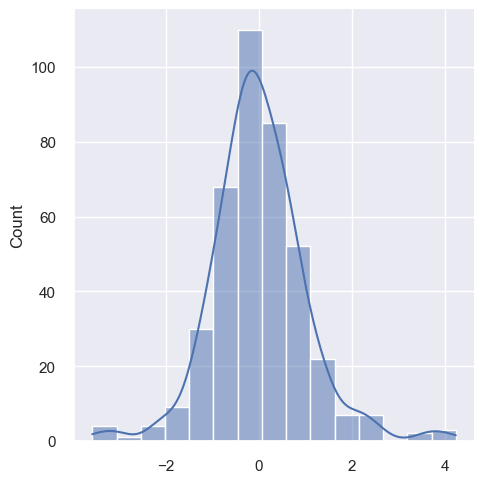

In [158]:
# plot histogram of residuals
sns.displot(data=residuals, bins=15, kde = True)
plt.show()


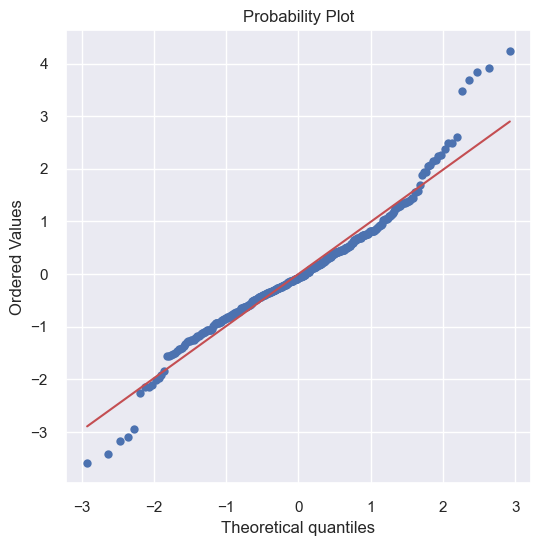

In [159]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Observations:**
* This is a heavy-tailed distribution.
* It shows up with the points being below the line in the left tail (more extreme negative than expected by the normal) 
* and the points being above the line for the right tail (more extreme positive than the normal).
* Also, the points appear to follow the displayed straight line but do not do so exactly. 
* This suggests that the residuals have a similar shape to the normal distribution, but are not necessarily linear. 
* Some variation is present around the line and patterns of deviation are fairly expected. 
* This distribution does not identically match the normal distribution. 
* Deviations are evident at the top and the bottom of the line, which might suggest skew. 
* The data does not represent a lot of spread. 

### Check the performance of the model on the train and test data set

#### **Question 8:** Write your observations by comparing model performance of train and test dataset (2 Marks)

In [160]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


model_pref(model2, X_train_model2, X_test_model2)  


    Data      RMSE       MAE      MAPE
0  Train  0.191208  0.139041  4.827107
1   Test  0.207741  0.158037  5.553282


**Observations:**
* The Test data RSME, MAE, MAPE is slightly higher than that of the Train data: 
* this might suggest that the RSME-MAE difference isn't large enough to indicate the presence of very large errors. 
* Since RSME > MAE for both Test and Train, there is some variation in the magnitude of errors. 

#### Apply cross validation to improve the model and evaluate it using different evaluation metrics

#### **Question 9:** Apply the cross validation technique to improve the model and evaluate it using different evaluation metrics. (1 Mark)

In [161]:
# import the required function
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# build the regression model and cross-validate
#coef = KFold(n_splits=5, shuffle=True, random_state=1)
linearregression = LinearRegression() 
linearregression.fit(X, Y)

cv_Score11 = cross_val_score(linearregression, X, Y, cv=3)
print('-----------CV_SCORE11 values-------------:\n', cv_Score11)

cv_Score12 = cross_val_score(linearregression, X, Y, cv=3)
print('\n-----------CV_SCORE12 values-------------:\n', cv_Score12)


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))


-----------CV_SCORE11 values-------------:
 [0.5740355  0.56382582 0.35304522]

-----------CV_SCORE12 values-------------:
 [0.5740355  0.56382582 0.35304522]
RSquared: 0.497 (+/- 0.204)
Mean Squared Error: -0.497 (+/- 0.204)


**Observations**
- The R-squared on the cross validation is 0.759, whereas on the training dataset it was 0.769
- And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

#### **Question 10:** Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. Write the regression equation. (2 Marks)

In [162]:
coef = pd.concat([pd.Series(X.columns), pd.Series(linearregression.coef_)], axis=1)
coef.columns=["variable", "coefficient"]
coef

,variable,coefficient
0,const,0.000000
1,CRIM,-0.010619
2,CHAS,0.123795
3,NOX,-0.918473
4,RM,0.095826
5,DIS,-0.045207
6,RAD,0.004528
7,PTRATIO,-0.042095
8,LSTAT,-0.029971


In [ ]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

#### **Question 11:** Write the conclusions and business recommendations derived from the model. (5 Marks)

Write Conclusions here

The goal of this report is to predict the housing prices of a town or a suburb based on the features of the locality provided. Thus, the variable MEDV is the target variable that describes the Median value of owner-occupied homes in 1000 dollars. 

Hypothetically, the data features, represent two areas that help establish homes' median value(s), MEDV: 
    ***-1-***) urban core(s), where crime rate(s) CRIM and nitric oxide concentration(s) NOX are higher and homes are newer-built AGE (built after 1940).
        ***-A-*** The full-value property tax rate per 10,000 TAX and the accessibility to five Boston employment centers DIS, are almost perfectly correlated. 
            ***-i-***) Homes near urban areas have a slightly higher MEDV and are taxed higher, where access to employment by way of radial highways RAD is more significantly accessible. 
            ***-ii-***) Homes with more rooms typically have a higher median-value MEDV.
    ***-2-***) Non-urban core(s), where crime rate(s) CRIM and nitric oxide concentration(s) NOX tend to be lower, and homes are older-built AGE (built before 1940). 
        ***-a-***) The full-value property tax rate per 10,000 TAX and the accessibility to five Boston employment centers DIS are lower in non-urban areas. 
            ***-i-***). Homes near non-urban areas have a slightly lower MEDV and are taxed lower, where access to employment by way of radial highways RAD is significantly more inaccessible.
            ***-ii-***). However, an increase in the number of rooms per dwelling doesn't necessarily increase the % lower status of population owners' MEDV values. 


Write Recommendations here

To sustain a higher median value of an owner-occupied home in 1000 dollars, the home should fall under the urban core area(s), where crime rate(s) CRIM and nitric oxide concentration(s) NOX are typically higher and the home is assumed newer-built AGE (built after 1940). Furthermore, homes with higher median value MEDV, usually have a higher full-value property tax rate per 10,000 TAX and also provide ease in accessibility to employment centers DIS. Homes near urban areas have a slightly higher MEDV and are taxed higher, where access to employment by way of radial highways RAD is more significantly accessible and accessibility to employment centers DIS is also more convenient. Furthermore, to sustain a higher median value, a home should aim for more rooms than average. 

Please see pitfalls of these assumptions below: 

NOTEWORTHY:        
        
- For the average number of rooms per dwelling RM, there is a slight and negative correlation with the other features. There is a significant 
negative correlation between RM, and specifically, %lower status of population LSTAT, which represents an idea that an increase in the number of rooms per 
dwelling doesn't necessarily increase the %lower status of a population as could be assumed. 

- As the median value of owner-occupied homes in 1000 dollars increases MEDV, it would be simple to assume that per 
capita crime rate by town CRIM should also increase; however, this is not the case, there is a negative 
correlation between MEDV and CRIM, albeit small. 

- Pupil-teacher ratio by town PTRATIO, does not seem to affect per capita crime rate by town CRIM. 

- NO income was reported for individual(s) assumed as owner-occupied per unit. Income would help further classify the %lower population status assumption that in areas where there is a higher %lower population status of owners, the MEDV, median value(s) of homes are also typically lower in value. 

- There is no explanation evident why the proportion of residential land zoned for lots over 25,000 sq. ft. ZN appears to be taxed 
at a lower full-value property-tax rate TAX. 

- ALSO a very small town will not have a suburb, which is not represented by this data very well. 